
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [1]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 


Using TensorFlow backend.


In [2]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

#   第二步：構建網絡層
 
model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

In [3]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1149010


In [4]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_3 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               250500    
__________

In [5]:
 '''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''


'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''


rmsprop = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

In [6]:
# 第三步：編譯, 
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])  
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)


In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

### adam
- batch_size = 128
- epochs = 20

In [9]:
batch_size = 128
epochs = 20
history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )


Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 5s - loss: 2.8842 - acc: 0.8198 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 2/20
 - 3s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 3/20
 - 3s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 4/20
 - 3s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 5/20
 - 4s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 6/20
 - 3s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 7/20
 - 3s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 8/20
 - 3s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 9/20
 - 4s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 10/20
 - 4s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 11/20
 - 4s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 12/20
 - 4s - loss: 2.8898 - 

 test set 

 The test loss is %f  [2.8918549060821532, 0.8196000051498413]

 The accuracy of the model is 0.098000 


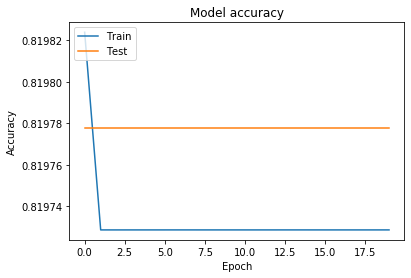

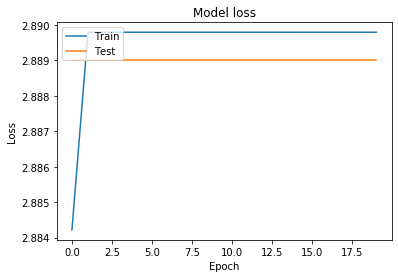

In [10]:
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### adam
- batch_size = 256
- epochs = 20

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 3s - loss: 2.8837 - acc: 0.8198 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 2/20
 - 2s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 3/20
 - 2s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 4/20
 - 2s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 5/20
 - 2s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 6/20
 - 2s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 7/20
 - 2s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 8/20
 - 2s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 9/20
 - 2s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 10/20
 - 2s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 11/20
 - 2s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 12/20
 - 2s - loss: 2.8898 - 

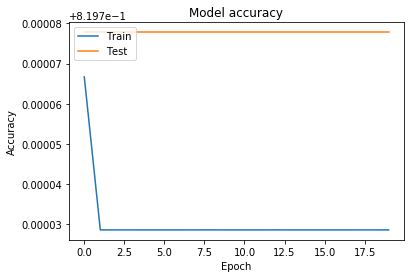

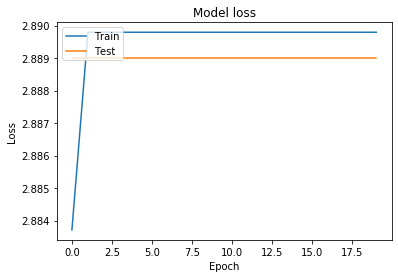

In [11]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model_lowbatchsize = Sequential()

#   第二步：構建網絡層
 
model_lowbatchsize.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
model_lowbatchsize.add(Activation('relu')) # 激活函數是relu   

model_lowbatchsize.add(Dense( 500)) # 隱藏層節點500個   
model_lowbatchsize.add(Activation('relu'))  

model_lowbatchsize.add(Dense( 500)) # 隱藏層節點500個   
model_lowbatchsize.add(Activation('relu'))  

model_lowbatchsize.add(Dense( 500)) # 隱藏層節點500個   
model_lowbatchsize.add(Activation('relu'))  

model_lowbatchsize.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model_lowbatchsize.add(Activation('softmax')) # 最後一層用softmax作為激活函數

model_lowbatchsize.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
batch_size = 256
epochs = 20
history = model_lowbatchsize.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )
print ( " test set " )
scores = model_lowbatchsize.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model_lowbatchsize.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### SGD

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 4s - loss: 1.0552 - acc: 0.9146 - val_loss: 0.1620 - val_acc: 0.9691
Epoch 2/20
 - 3s - loss: 0.0696 - acc: 0.9837 - val_loss: 0.0789 - val_acc: 0.9812
Epoch 3/20
 - 3s - loss: 0.0345 - acc: 0.9905 - val_loss: 0.0799 - val_acc: 0.9812
Epoch 4/20
 - 3s - loss: 0.0205 - acc: 0.9942 - val_loss: 0.0543 - val_acc: 0.9861
Epoch 5/20
 - 3s - loss: 0.0128 - acc: 0.9965 - val_loss: 0.0503 - val_acc: 0.9870
Epoch 6/20
 - 3s - loss: 0.0082 - acc: 0.9980 - val_loss: 0.0468 - val_acc: 0.9884
Epoch 7/20
 - 3s - loss: 0.0055 - acc: 0.9988 - val_loss: 0.0461 - val_acc: 0.9887
Epoch 8/20
 - 3s - loss: 0.0038 - acc: 0.9993 - val_loss: 0.0457 - val_acc: 0.9889
Epoch 9/20
 - 3s - loss: 0.0029 - acc: 0.9995 - val_loss: 0.0453 - val_acc: 0.9891
Epoch 10/20
 - 3s - loss: 0.0022 - acc: 0.9997 - val_loss: 0.0452 - val_acc: 0.9889
Epoch 11/20
 - 3s - loss: 0.0017 - acc: 0.9998 - val_loss: 0.0453 - val_acc: 0.9892
Epoch 12/20
 - 3s - loss: 0.0015 - 

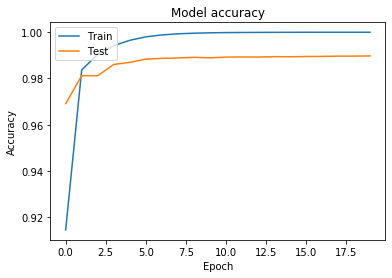

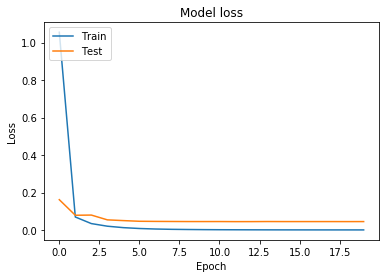

In [12]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model_sgd = Sequential()

#   第二步：構建網絡層
 
model_sgd.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
model_sgd.add(Activation('relu')) # 激活函數是relu   

model_sgd.add(Dense( 500)) # 隱藏層節點500個   
model_sgd.add(Activation('relu'))  

model_sgd.add(Dense( 500)) # 隱藏層節點500個   
model_sgd.add(Activation('relu'))  

model_sgd.add(Dense( 500)) # 隱藏層節點500個   
model_sgd.add(Activation('relu'))  

model_sgd.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model_sgd.add(Activation('softmax')) # 最後一層用softmax作為激活函數

model_sgd.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

batch_size = 128
epochs = 20
history = model_sgd.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )
print ( " test set " )
scores = model_sgd.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model_sgd.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Rmsprop

Train on 42000 samples, validate on 18000 samples
Epoch 1/8
 - 4s - loss: 2.8853 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 2/8
 - 3s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 3/8
 - 3s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 4/8
 - 4s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 5/8
 - 3s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 6/8
 - 3s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 7/8
 - 3s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 8/8
 - 3s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
 test set 

 The test loss is %f  [2.8989082527160646, 0.8191600251197815]

 The accuracy of the model is 0.095800 


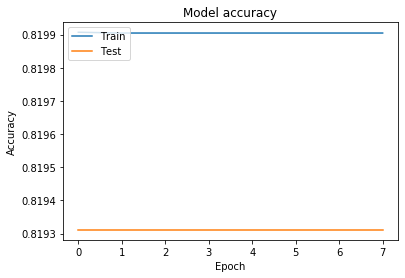

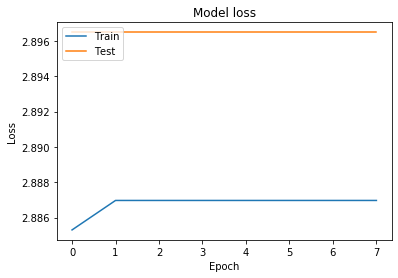

In [15]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model_rmsprop = Sequential()

#   第二步：構建網絡層
 
model_rmsprop.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
model_rmsprop.add(Activation('relu')) # 激活函數是relu   

model_rmsprop.add(Dense( 500)) # 隱藏層節點500個   
model_rmsprop.add(Activation('relu'))  

model_rmsprop.add(Dense( 500)) # 隱藏層節點500個   
model_rmsprop.add(Activation('relu'))  

model_rmsprop.add(Dense( 500)) # 隱藏層節點500個   
model_rmsprop.add(Activation('relu'))  

model_rmsprop.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model_rmsprop.add(Activation('softmax')) # 最後一層用softmax作為激活函數


rmsprop = keras.optimizers.RMSprop(lr=0.1, rho=0.9, epsilon=None, decay=0.0)
model_rmsprop.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])

batch_size = 128
epochs = 8
history = model_rmsprop.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )
print ( " test set " )
scores = model_rmsprop.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model_rmsprop.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()